# ESTRATEGIA SIZE

## Autor: María Carrasco Meléndez, Raquel Fort Serra y Lucía Saiz Lapique

__Práctica 9 y 10__

__Gestión de Activos y Carteras__

__CUNEF__

Esta estrategia de optimización de carteras es la estrategia Size. A partir de esta estrategia, se establecerá un ranking de acciones por menor capitalización. Para ello habrá que calcular la capitalización bursátil.

Nos situamos en una posición larga en aquellas empresas de menor capitalización y, en una posición corta en las de mayor. Las empresas de menor capitalización no son tan seguidas por el mercado y, por tanto, presentan un mayor valor y potencial de alfa.

Esta estrategia realiza un ranking de todos los activos en función a las posiciones de cada uno a corto o largo plazo.
El objetivo no es solo optimizar las rentabilidades de las acciones seleccionadas, sino hacer pruebas a la hora de seleccionar una estrategia u otra. 

In [44]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data as pdr

In [45]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

Importamos los índices MXWO.

In [46]:
index = pd.read_excel('indices.xlsx')
index = index.set_index('Date')
index.head()

,MXWO Index,MXWOSC Index
Date,,
2012-04-18,1283.87,234.16
2012-04-19,1277.72,233.23
2012-04-20,1281.71,234.13
2012-04-23,1264.21,230.65
2012-04-24,1271.80,231.67


En primer lugar calculamos la rentabilidad obtenida a lo largo del tiempo con ambos índices. Los pondremos en base 100 para posteriormente comparar la evolución de los índices y de la estrategia.

In [47]:
for columna in index.columns:
    
    # rentabilidades
    index['Returns {}'.format(columna)] = index[columna].pct_change()
    
    # base 100
    index['Evolucion {}'.format(columna)] = 100
    
    for i in range(1, len(index)):
        
        # resultado en base 100
        index['Evolucion {}'.format(columna)].iloc[i] = index['Evolucion {}'.format(columna)].iloc[i-1]*(1+index['Returns {}'.format(columna)].iloc[i])

# borro los NaN del primer día
index.dropna(inplace = True)

index.head()

,MXWO Index,MXWOSC Index,Returns MXWO Index,Evolucion MXWO Index,Returns MXWOSC Index,Evolucion MXWOSC Index
Date,,,,,,
2012-04-19,1277.72,233.23,-0.004790,99.520980,-0.003972,99.602836
2012-04-20,1281.71,234.13,0.003123,99.831759,0.003859,99.987188
2012-04-23,1264.21,230.65,-0.013654,98.468692,-0.014864,98.501025
2012-04-24,1271.80,231.67,0.006004,99.059874,0.004422,98.936625
2012-04-25,1285.52,234.92,0.010788,100.128518,0.014029,100.324564


A continuación calculamos los resultados de la estrategia. Adoptaremos una pocisión larga en las empresas de menor capitalización, MXWO, y una corta en las de mayor, MXWOSC.

In [48]:
index['Estrategia'] = 100

for i in range(1, len(index)):
    
    
    index.Estrategia.iloc[i] = index.Estrategia.iloc[i-1] * (1 + index['Returns MXWO Index'].iloc[i] - 
                                                            index['Returns MXWOSC Index'].iloc[i])

In [49]:
index.head()

,MXWO Index,MXWOSC Index,Returns MXWO Index,Evolucion MXWO Index,Returns MXWOSC Index,Evolucion MXWOSC Index,Estrategia
Date,,,,,,,
2012-04-19,1277.72,233.23,-0.004790,99.520980,-0.003972,99.602836,100.000000
2012-04-20,1281.71,234.13,0.003123,99.831759,0.003859,99.987188,99.926390
2012-04-23,1264.21,230.65,-0.013654,98.468692,-0.014864,98.501025,100.047291
2012-04-24,1271.80,231.67,0.006004,99.059874,0.004422,98.936625,100.205512
2012-04-25,1285.52,234.92,0.010788,100.128518,0.014029,100.324564,99.880775


## COMPARACION

Ahora queremos observar los resultados de nuestra estrategia y su evolución. Para ponerla en contexto la compararemos con cada uno de los índices.

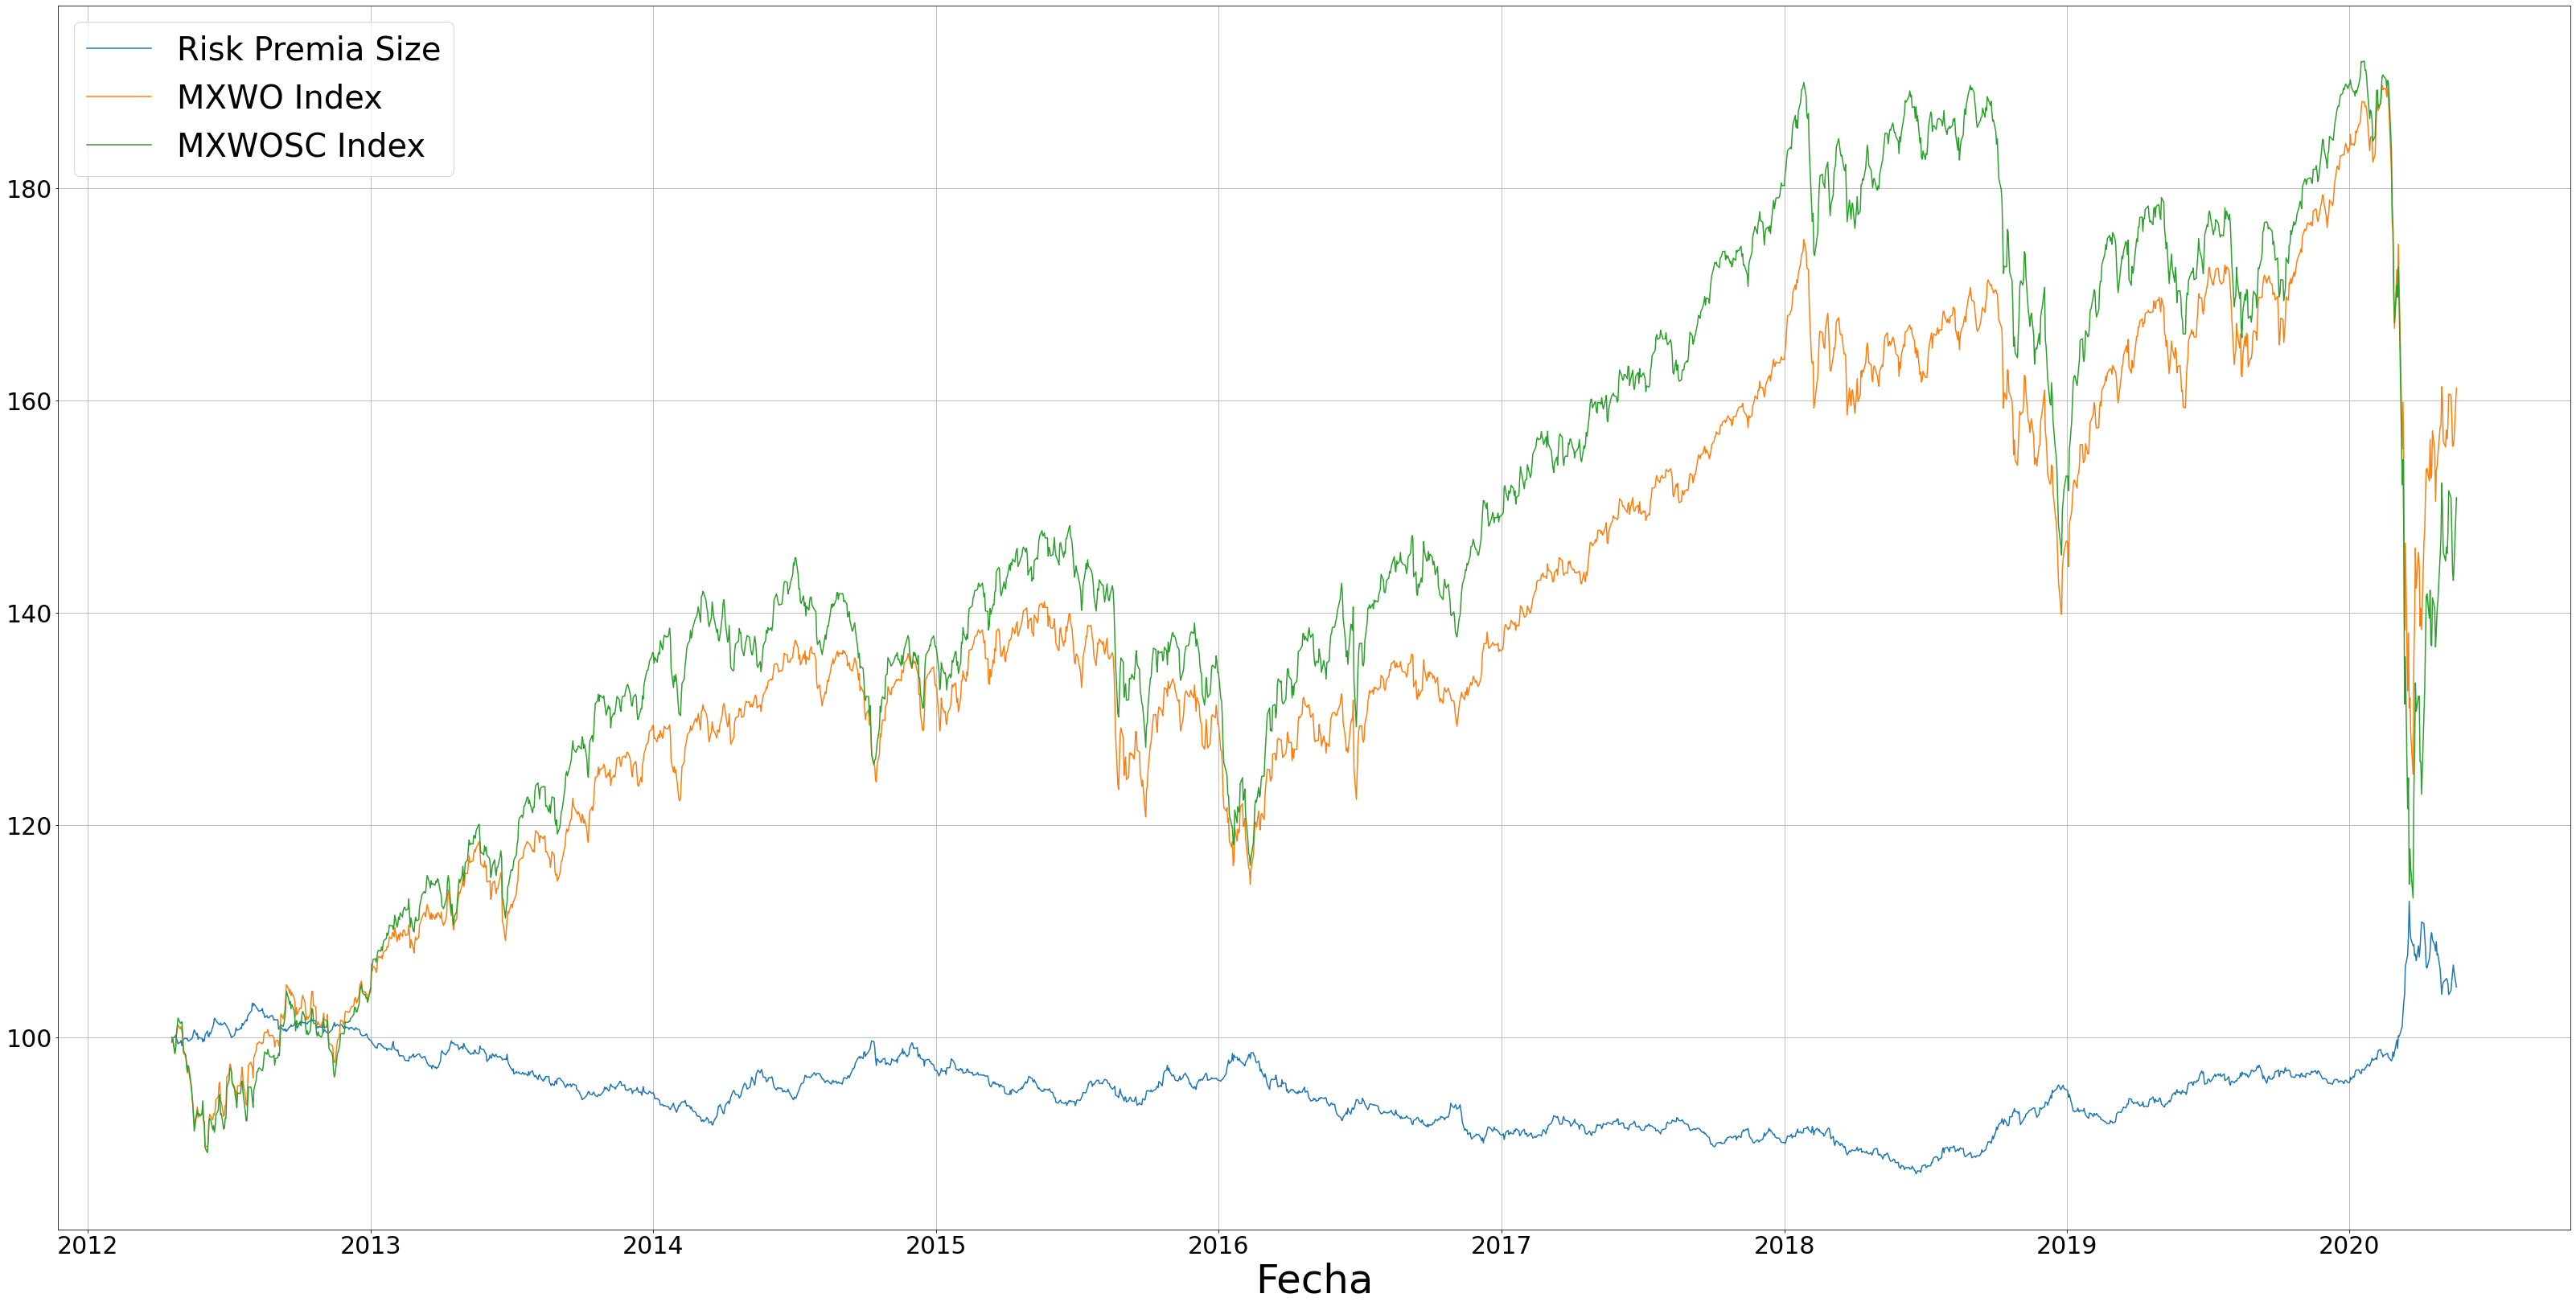

In [50]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(index["Estrategia"])
ax1 = plt.plot(index["Evolucion MXWO Index"])
ax1 = plt.plot(index["Evolucion MXWOSC Index"])
ax1 = plt.xlabel("Fecha", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Risk Premia Size", "MXWO Index", "MXWOSC Index"],
                 prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

Parece ser que la estrategia durante la primera mitad del 2012 tiene resultados positivos en comparación con la evolución de los 2 índices. Pero durante el resto del periodo estudiado su evolcuión ofrece resultados inferiores a los de los índices _MXWO_ y _MXWOSC_.



Guardamos los resultados de la estrategia en formato csv para posteriormente utilizarlos en la construcción de una cartera.

In [51]:
risk_size = pd.DataFrame({'Risk Premia Size': index['Estrategia']})
risk_size.to_csv('Estrategia_size_final.csv')